In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2]) 

#🔹 header=None মানে প্রথম লাইনে কোনো কলামের নাম নেই, তাই ওটাকে ডাটা হিসেবেই ধরবে।
#🔹 usecols=[0,1,2] মানে শুধু ০, ১, এবং ২ নম্বর কলামগুলো নেবে, বাকিগুলো বাদ দেবে।

df.columns=['Class label', 'Alcohol', 'Malic acid'] # iccha moto nam diye nilam.

In [4]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

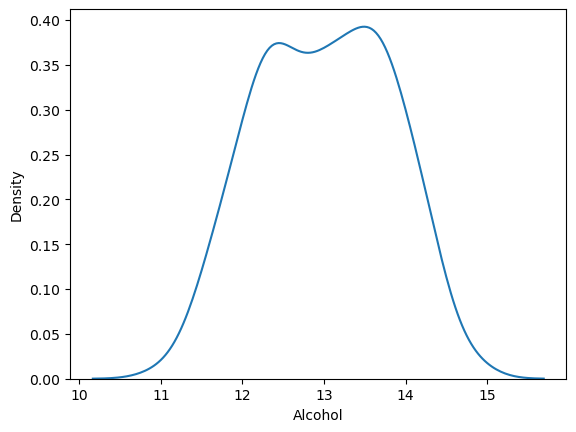

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

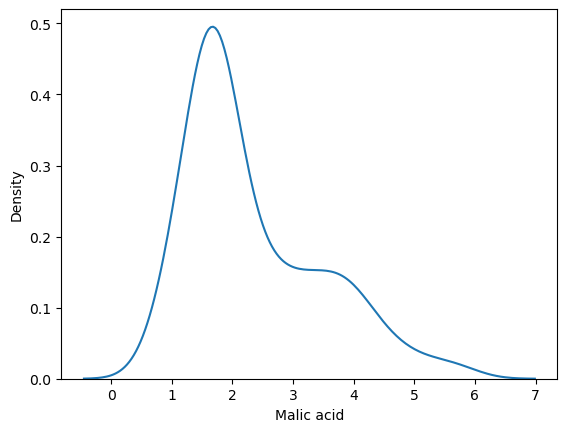

In [6]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

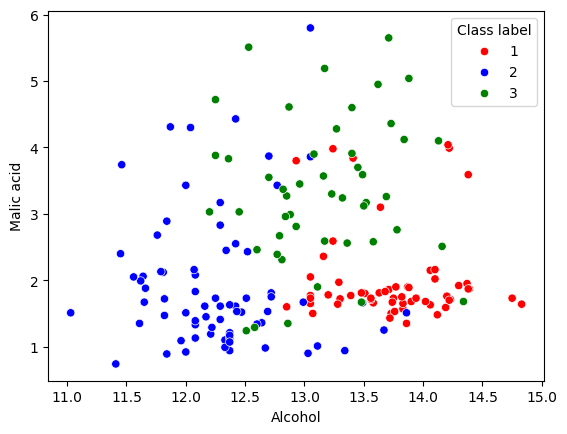

In [7]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label',axis=1),
                                                   df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape ,X_test.shape

((124, 2), (54, 2))

### MinMaxScaler নোট  

#### **📌 MinMaxScaler কী?**  
MinMaxScaler হল একটি **Feature Scaling** টেকনিক, যা ডেটার **সর্বনিম্ন মানকে 0** এবং **সর্বোচ্চ মানকে 1** বানিয়ে স্কেল করে। এটি মূলত ডেটার মানগুলিকে একটি নির্দিষ্ট রেঞ্জে (০-১) নিয়ে আসে, যাতে মডেল ট্রেনিং আরও কার্যকর হয়।  

---

#### **🔢 MinMaxScaler এর ফর্মুলা:**  
Scaler যেভাবে ডেটার নতুন মান নির্ণয় করে:  

$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$


**যেখানে:**  
- \( X \) = মূল ডেটা পয়েন্ট  
- \( X_{\min} \) = ডেটার মধ্যে সর্বনিম্ন মান  
- \( X_{\max} \) = ডেটার মধ্যে সর্বোচ্চ মান  
- \( X_{\text{scaled}} \) = স্কেল করা নতুন মান (০-১ এর মধ্যে)  

---

#### **💻 Python Code:**  
```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # MinMaxScaler অবজেক্ট তৈরি করা হলো

scaler.fit(X_train)  # শুধুমাত্র X_train ব্যবহার করে min এবং max নির্ণয় করা হলো

X_train_scaled = scaler.transform(X_train)  # X_train-এর মান 0-1 রেঞ্জে স্কেল করা হলো
X_test_scaled = scaler.transform(X_test)  # X_test-এর মান X_train-এর স্কেলিং অনুযায়ী রূপান্তর করা হলো
```

---

#### **📌 এখানে কী হচ্ছে?**  
1. **`MinMaxScaler()`** → MinMaxScaler তৈরি করা হলো।  
2. **`fit(X_train)`** → X_train থেকে `X_min` এবং `X_max` নির্ধারণ করলো।  
3. **`transform(X_train)`** → X_train-এর সব ভ্যালুকে **০-১ স্কেলে** কনভার্ট করলো।  
4. **`transform(X_test)`** → X_test-এর মানগুলোও একই স্কেলে রূপান্তর করা হলো (X_train থেকে শেখা min-max অনুযায়ী)।  

---

#### **✅ MinMaxScaler কেন ব্যবহার করা হয়?**  
- ডেটার **স্কেল বড় ছোট হলে** মডেল খারাপ পারফর্ম করতে পারে, তাই স্কেলিং দরকার।  
- **Gradient Descent-এর জন্য ভালো কাজ করে**, কারণ বড় সংখ্যাগুলোর জন্য লার্নিং আরও কার্যকর হয়।  
- **Deep Learning ও Machine Learning মডেল ট্রেনিং আরও ভালো হয়**।  

এই নোটটি **এই কোডের জন্য** একদম পারফেক্ট! 😊

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [35]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [39]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [43]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After scaling')

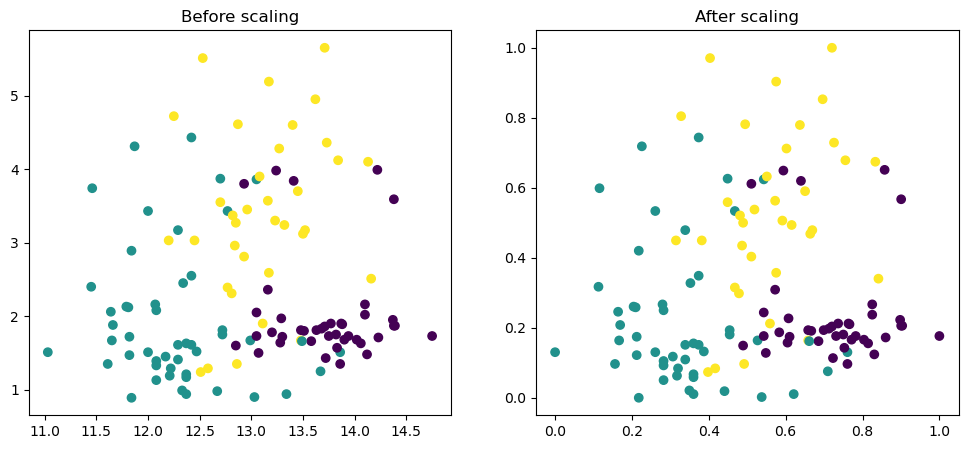

In [59]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before scaling')

ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After scaling')

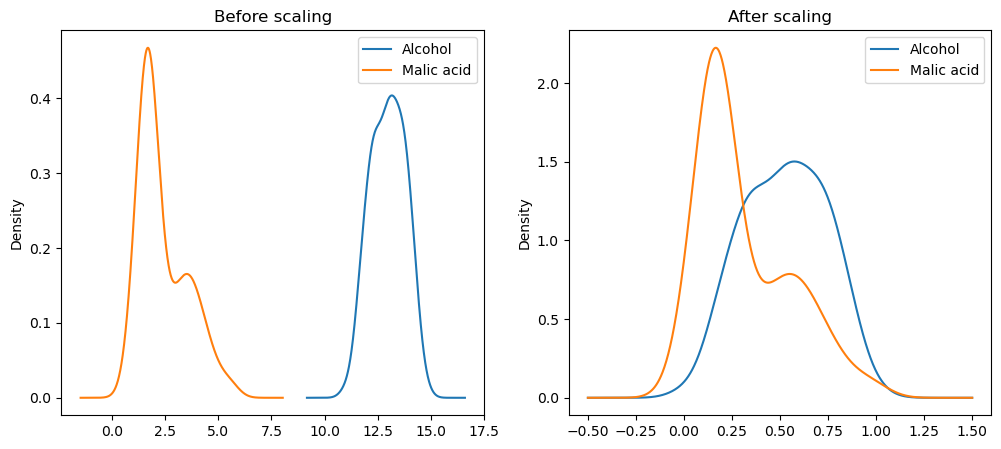

In [81]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling

X_train[['Alcohol','Malic acid']].plot(kind='kde',ax=ax1)
ax1.set_title('Before scaling')

#after scaling

X_train_scaled[['Alcohol','Malic acid']].plot(kind='kde',ax=ax2)
ax2.set_title('After scaling')


plt.show()

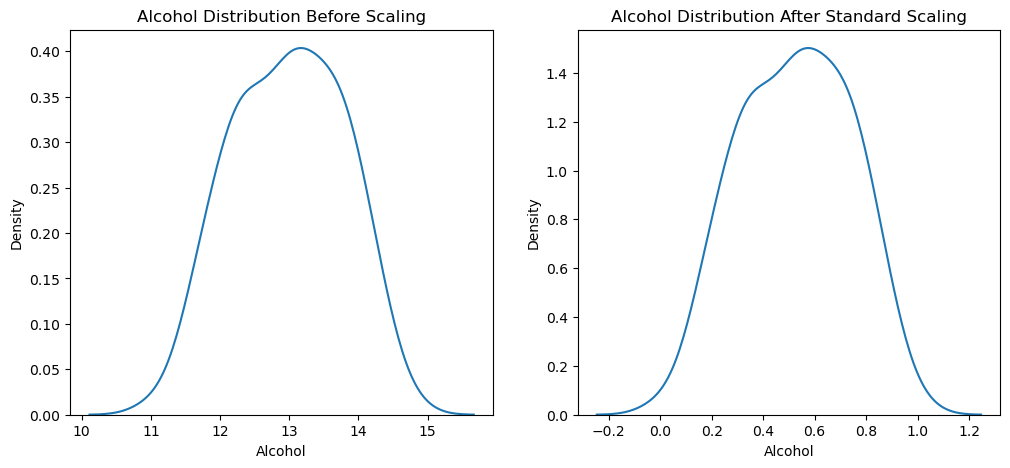

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()


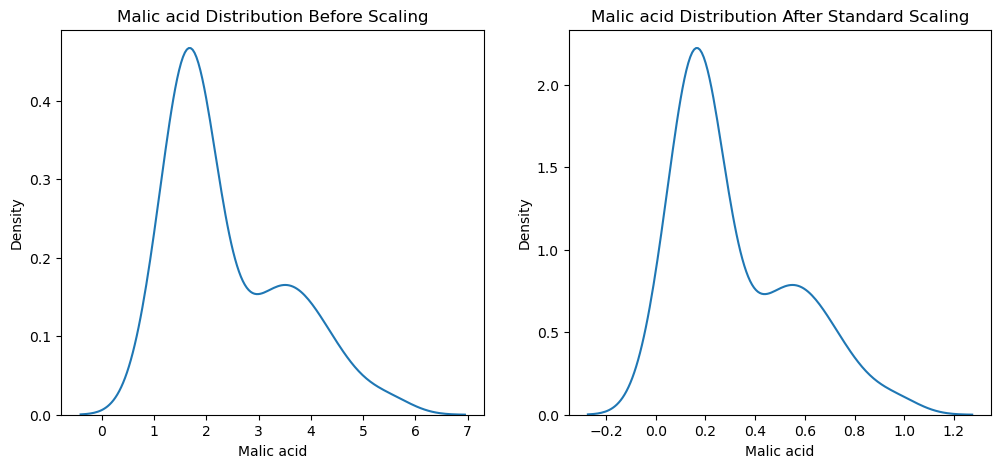

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()